<a href="https://colab.research.google.com/github/torontodeveloper/berkeley-ai-llm-foundations/blob/main/KevinKakollaConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Name: Kevin Kakolla
# Student ID: X257515

In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models

In [ ]:
print('Num GPUs Available',tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nageswarraokakolla","key":"548ab64ccef1add72a9d2663b0b48f98"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
 99% 103M/105M [00:06<00:00, 22.7MB/s]
100% 105M/105M [00:06<00:00, 17.8MB/s]


In [ ]:
!unzip cifake-real-and-ai-generated-synthetic-images

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

In [ ]:
train_dataset_path = '/conent/train'
test_dataset_path = '/content/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [ ]:
train_data = train_data_gen.flow_from_directory('/content/train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 100000 images belonging to 2 classes.


In [ ]:
test_data = test_data_gen.flow_from_directory('/content/train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 100000 images belonging to 2 classes.


In [ ]:
import cv2

image = cv2.imread('/content/train/REAL/0000 (4).jpg')

In [ ]:
image.shape

(32, 32, 3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
# Flatten the layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,273 (2.47 MB)

 Trainable params: 646,273 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 301s 95ms/step - accuracy: 0.7957 - loss: 0.4238 - val_accuracy: 0.9087 - val_loss: 0.2259
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 293s 94ms/step - accuracy: 0.9033 - loss: 0.2359 - val_accuracy: 0.9176 - val_loss: 0.2067
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 295s 94ms/step - accuracy: 0.9188 - loss: 0.2017 - val_accuracy: 0.9279 - val_loss: 0.1815
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 295s 94ms/step - accuracy: 0.9275 - loss: 0.1828 - val_accuracy: 0.9396 - val_loss: 0.1567
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 295s 94ms/step - accuracy: 0.9323 - loss: 0.1731 - val_accuracy: 0.9337 - val_loss: 0.1698
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 294s 94ms/step - accuracy: 0.9360 - loss: 0.1650 - val_accuracy: 0.9434 - val_loss: 0.1449
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 294s 94ms/step - accuracy: 0.9413 - loss: 0.1519 - val_accuracy: 0.9371 - val_loss: 0.1616
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 294s 94ms/step - accuracy: 0.9416 - lo

In [ ]:
score = model.evaluate(test_data)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.9381 - loss: 0.1634


In [ ]:
print('Validation , Loss',score[0])
print('Validation , Accuracy',score[1])

Validation , Loss 0.1630309820175171
Validation , Accuracy 0.9377300143241882


In [ ]:
# let's plot the learning curves

# note: it's unusual for val accuracy to be higher than training
# accuracy; that must have happend due to chance, or perhaps
# we should have better shuffled our input data

def plot_learning_curves(history):

  # plot curves for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # plot curves for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

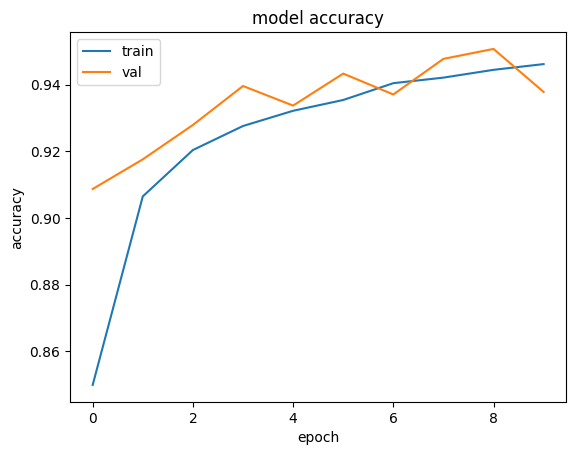

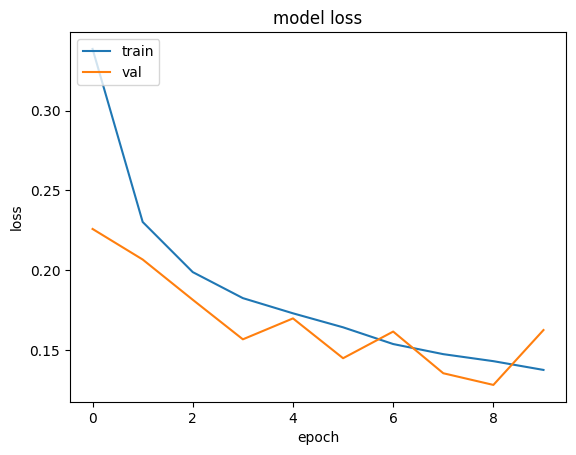

In [ ]:
plot_learning_curves(history)

# Conclusion & Analysis:

## Low Loss of 0.12162147462368011 and High accuracy (0.9524499773979187) is generally good indicating that model is predictly correctly for 95% of validation data. This is excellent result for Image classification task.
### we can still improve the performance of model by applying overfitting technqiues such as data augmentation, early stopping, dropout